Observed Table:
         Spend >= $50  Spend < $50
Group A            80          120
Group B           110           90

Expected Table (Calculated):
         Spend >= $50  Spend < $50
Group A          95.0        105.0
Group B          95.0        105.0

Chi-Square Statistic (Manual): 9.023
Critical Chi-Square Value: 3.841
Degrees of Freedom: 1
Decision: Reject the null hypothesis (significant difference).


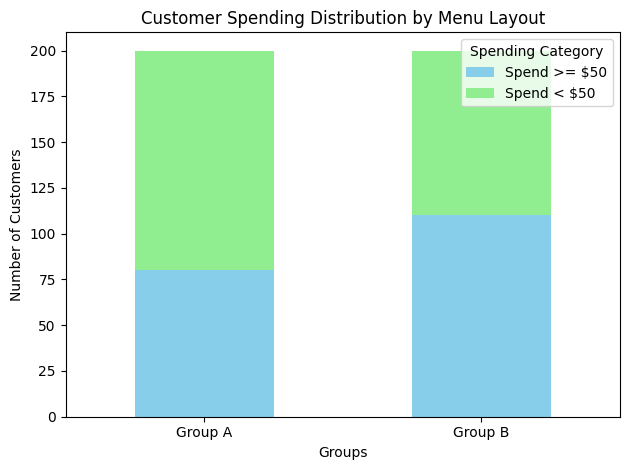

In [8]:
import numpy as np
from scipy.stats import chi2
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Observed values
observed = np.array([[80, 120], [110, 90]])

# Step 2: Calculate row totals, column totals, and grand total
row_totals = observed.sum(axis=1)
column_totals = observed.sum(axis=0)
grand_total = observed.sum()

# Step 3: Calculate expected values using the formula
expected = np.outer(row_totals, column_totals) / grand_total

# Step 4: Calculate the Chi-Square statistic manually
chi_square_statistic = np.sum((observed - expected)**2 / expected)

# Step 5: Degrees of freedom and significance level (df = (rows-1) * (cols-1))
df = (observed.shape[0] - 1) * (observed.shape[1] - 1)
alpha = 0.05

# Step 6: Critical value from the Chi-Square distribution for df=1 and alpha=0.05
critical_value = chi2.ppf(1 - alpha, df)

# Step 7: Decision rule: compare chi-square statistic with critical value
if chi_square_statistic > critical_value:
    decision = "Reject the null hypothesis (significant difference in customer spending between the two menu layouts)."
else:
    decision = "Fail to reject the null hypothesis (no significant difference)."

# Output the results
print("Observed Table:")
print(pd.DataFrame(observed, index=["Group A", "Group B"], columns=["Spend >= $50", "Spend < $50"]))

print("\nExpected Table (Calculated):")
print(pd.DataFrame(expected.round(2), index=["Group A", "Group B"], columns=["Spend >= $50", "Spend < $50"]))

print(f"\nChi-Square Statistic (Manual): {chi_square_statistic:.3f}")
print(f"Critical Chi-Square Value: {critical_value:.3f}")
print(f"Degrees of Freedom: {df}")
print(f"Decision: {decision}")

# Step 8: Plotting a bar graph to compare the spending patterns

# Creating a pandas DataFrame for plotting
data = {
    "Spend >= $50": [80, 110],
    "Spend < $50": [120, 90]
}
groups = ["Group A", "Group B"]
df_plot = pd.DataFrame(data, index=groups)

# Plot the data
df_plot.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title("Customer Spending Distribution by Menu Layout")
plt.xlabel("Groups")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Spending Category")
plt.tight_layout()
plt.show()
